# Arlington PDF Model Jupyter Notebook

This notebook demonstrates how the Arlington PDF Model can be combined into a monolithic TSV file suitable for use by pandas in a Jupyter Notebook. The Python script `arlington-to-pandas.py` will convert an Arlington file set into a single TSV file by adding the object name as the first (left-most) field called "Object".

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('pandas.tsv', delimiter='\t', na_filter=False,
                 dtype={'Object':'string', 'Key':'string', 'Type':'string', 
                        'SinceVersion':'string', 'DeprecatedIn':'string', 'Required':'string', 
                        'IndirectReference':'string', 'Inheritable':'string', 
                        'DefaultValue':'string', 'PossibleValues':'string', 
                        'SpecialCase':'string', 'Link':'string', 'Note':'string'})

The above two cells will have loaded the monolithic TSV into pandas as a Dataframe object. All fields are treated as strings to avoid NaN and other issues. This also matches how other Python scripts and the C++ PoC TestGrammar operate.
Here is what the data looks like:

In [3]:
df.head()

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
0,3DActivation,A,name,1.6,,FALSE,FALSE,FALSE,XA,"[PO,PV,XA]",,,
1,3DActivation,AIS,name,1.6,,FALSE,FALSE,FALSE,L,"[I,L]",,,
2,3DActivation,D,name,1.6,,FALSE,FALSE,FALSE,PI,"[PC,PI,XD]",,,
3,3DActivation,DIS,name,1.6,,FALSE,FALSE,FALSE,U,"[U,I,L]",,,
4,3DActivation,TB,boolean,1.7,,FALSE,FALSE,FALSE,true,,,,


In [4]:
df.tail()

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
3539,XRefStream,Info,dictionary,1.5,,FALSE,TRUE,FALSE,,,,[DocInfo],
3540,XRefStream,ID,array,1.5,,fn:IsRequired(fn:SinceVersion(2.0) || fn:IsPre...,fn:MustBeDirect(fn:IsPresent(Encrypt)),FALSE,,,[fn:Eval(fn:MustBeDirect(ID::0) && fn:MustBeDi...,"[fn:SinceVersion(1.1,ArrayOf_2StringsByte)]",
3541,XRefStream,Encrypt,dictionary,1.5,,FALSE,FALSE,FALSE,,,,"[fn:SinceVersion(1.1,EncryptionStandard),fn:Si...",
3542,_UniversalArray,*,array;boolean;dictionary;name;null;number;stre...,1.0,,FALSE,[FALSE];[FALSE];[FALSE];[FALSE];[FALSE];[FALSE...,FALSE,,,,[_UniversalArray];[];[_UniversalDictionary];[]...,
3543,_UniversalDictionary,*,array;boolean;dictionary;name;null;number;stre...,1.0,,FALSE,[FALSE];[FALSE];[FALSE];[FALSE];[FALSE];[FALSE...,FALSE,,,,[_UniversalArray];[];[_UniversalDictionary];[]...,


So how many keys or array elements does Arlington define? This will be the number of rows in the Dataframe!

In [5]:
len(df)

3544

In [6]:
df.dtypes

Object               string
Key                  string
Type                 string
SinceVersion         string
DeprecatedIn         string
Required             string
IndirectReference    string
Inheritable          string
DefaultValue         string
PossibleValues       string
SpecialCase          string
Link                 string
Note                 string
dtype: object

In [7]:
df.columns

Index(['Object', 'Key', 'Type', 'SinceVersion', 'DeprecatedIn', 'Required',
       'IndirectReference', 'Inheritable', 'DefaultValue', 'PossibleValues',
       'SpecialCase', 'Link', 'Note'],
      dtype='object')

The fields (columns) are easy to access:

In [8]:
df['Object']

0               3DActivation
1               3DActivation
2               3DActivation
3               3DActivation
4               3DActivation
                ...         
3539              XRefStream
3540              XRefStream
3541              XRefStream
3542         _UniversalArray
3543    _UniversalDictionary
Name: Object, Length: 3544, dtype: string

In [19]:
len(pd.unique(df['Object']))

515

In [9]:
df['Type'].str.split(';')

0                                                  [name]
1                                                  [name]
2                                                  [name]
3                                                  [name]
4                                               [boolean]
                              ...                        
3539                                         [dictionary]
3540                                              [array]
3541                                         [dictionary]
3542    [array, boolean, dictionary, name, null, numbe...
3543    [array, boolean, dictionary, name, null, numbe...
Name: Type, Length: 3544, dtype: object

Using Datafield query method we can create some simple filters over the data:

In [10]:
df.query('Key == "Subtype"')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
10,3DAnimationStyle,Subtype,name,1.7,,FALSE,FALSE,FALSE,None,"[None,Linear,Oscillating]",,,
14,3DBackground,Subtype,name,1.6,,FALSE,FALSE,FALSE,SC,[SC],,,
28,3DLightingScheme,Subtype,name,1.7,,TRUE,FALSE,FALSE,,"[Artwork,None,White,Day,Night,Hard,Primary,Blu...",,,
30,3DMeasure3DC,Subtype,name,2.0,,TRUE,FALSE,FALSE,,[3DC],,,
41,3DMeasureAD3,Subtype,name,2.0,,TRUE,FALSE,FALSE,,[AD3],,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,XObjectFormTrapNet,Subtype,name,1.3,2.0,TRUE,FALSE,FALSE,,[Form],,,
3421,XObjectFormType1,Subtype,name,1.0,,TRUE,FALSE,FALSE,,[Form],,,
3448,XObjectImage,Subtype,name,1.0,,TRUE,FALSE,FALSE,,[Image],,,
3478,XObjectImageMask,Subtype,name,1.3,,TRUE,FALSE,FALSE,,[Image],,,


In [11]:
df.query('("string-ascii" in Type) and (Required == "TRUE")')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
299,ActionURI,URI,string-ascii,1.1,,TRUE,FALSE,FALSE,,,,,
1493,CIDSystemInfo,Registry,string-ascii,1.2,,TRUE,FALSE,FALSE,,,,,
1494,CIDSystemInfo,Ordering,string-ascii,1.2,,TRUE,FALSE,FALSE,,,,,
3078,SoftwareIdentifier,U,string-ascii,1.5,,TRUE,FALSE,FALSE,,,,,
3241,TimeStampDict,URL,string-ascii,1.6,,TRUE,FALSE,FALSE,,,,,
3252,URLAlias,U,string-ascii,1.3,,TRUE,FALSE,FALSE,,,,,
3308,WebCaptureCommand,URL,string-ascii,1.3,,TRUE,FALSE,FALSE,,,,,


Not many fields are numeric, but we can do a simple histogram to get a feel of how many new keys were introduced in each PDF version:

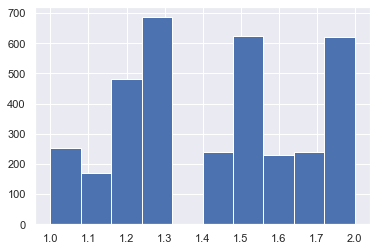

In [12]:
bin_sizes, _, _ = plt.hist(df['SinceVersion'].sort_values(ascending=True))

Let's try and identify this mysterious PDF object:
```
52 0 obj
<</R[146 522 153 542]/N 53 0 R/P 51 0 R/T 570 0
R/V 53 0 R>>
endobj
53 0 obj
<</R[352 570 359 590]/N 52 0 R/P 51 0 R/T 570 0
R/V 52 0 R>>
endobj
```
Lets make small Dataframes for each key we are interested in and limit the output to just the Object, Key and Type:

In [13]:
n_key = df.loc[df['Key']=="N", ['Object', 'Key', 'Type']]
p_key = df.loc[df['Key']=="P", ['Object', 'Key', 'Type']]
t_key = df.loc[df['Key']=="T", ['Object', 'Key', 'Type']]
r_key = df.loc[df['Key']=="R", ['Object', 'Key', 'Type']]

Now we can do inner-merge to intersect the sets with each other

In [14]:
df1 = pd.merge(n_key, p_key, how ='inner', on =['Object'])
df2 = pd.merge(t_key, r_key, how ='inner', on =['Object'])
pd.merge(df1, df2, how ='inner', on =['Object'])

,Object,Key_x_x,Type_x_x,Key_y_x,Type_y_x,Key_x_y,Type_x_y,Key_y_y,Type_y_y
0,Bead,N,dictionary,P,dictionary,T,dictionary,R,rectangle
1,BeadFirst,N,dictionary,P,dictionary,T,dictionary,R,rectangle
2,Target,N,string-byte,P,integer;string-byte,T,dictionary,R,name


From this result we can see that only Bead and BeadFirst objects have an R key which is an array (specifically, a rectangle in the Arlington predefined types). The Target R key needs to be a PDF name which the fragment is clearly not.
So the answer is that it is a Bead/BeadFirst dictionary! 

Let's now investigate inheritable-ness...

In [46]:
inheritable_keys = df.loc[df['Inheritable']=="TRUE", ['Object', 'Key', 'Type', 'Required', 'Inheritable', 'DefaultValue']]
len(inheritable_keys)

68

In [47]:
inheritable_keys

,Object,Key,Type,Required,Inheritable,DefaultValue
284,ActionSubmitForm,Flags,bitmask,FALSE,TRUE,0
285,ActionSubmitForm,CharSet,string,FALSE,TRUE,
1632,DocTimeStamp,Filter,name,TRUE,TRUE,
1733,FieldBtn,FT,name,TRUE,TRUE,
1739,FieldBtn,Ff,bitmask,FALSE,TRUE,
...,...,...,...,...,...,...
3158,StandardLayoutAttributesILSE,TextDecorationType,name,FALSE,TRUE,None
3159,StandardLayoutAttributesILSE,RubyAlign,name,FALSE,TRUE,Distribute
3160,StandardLayoutAttributesILSE,RubyPosition,name,FALSE,TRUE,Before
3161,StandardLayoutAttributesILSE,GlyphOrientationVertical,name;number,FALSE,TRUE,[Auto];[]


So there are a total of 68 keys defined to have inheritance (of some kind) in PDF 2.0 (as defined by ISO 32000-2:2020).

Let's narrow to required keys that also inheritable:

In [48]:
inheritable_and_required_keys = inheritable_keys.loc[inheritable_keys['Required']=="TRUE"] 
inheritable_and_required_keys

,Object,Key,Type,Required,Inheritable,DefaultValue
1632,DocTimeStamp,Filter,name,TRUE,TRUE,
1733,FieldBtn,FT,name,TRUE,TRUE,
1741,FieldBtn,DA,string,TRUE,TRUE,
1748,FieldCh,FT,name,TRUE,TRUE,
1758,FieldCh,DA,string,TRUE,TRUE,
1769,FieldSig,FT,name,TRUE,TRUE,
1779,FieldSig,DA,string,TRUE,TRUE,
1785,FieldTx,FT,name,TRUE,TRUE,
1795,FieldTx,DA,string,TRUE,TRUE,
2608,PageObject,Resources,dictionary,TRUE,TRUE,


Everyone thinks that there are more required and inheritable keys in the PageObject... 

In [49]:
inheritable_keys.query('Object=="PageObject"')

,Object,Key,Type,Required,Inheritable,DefaultValue
2608,PageObject,Resources,dictionary,TRUE,TRUE,
2609,PageObject,MediaBox,rectangle,TRUE,TRUE,
2610,PageObject,CropBox,rectangle,FALSE,TRUE,@MediaBox
2616,PageObject,Rotate,integer,FALSE,TRUE,0
2638,PageObject,Hid,boolean,FALSE,TRUE,false


What is this "Hid" key?? That's not in ISO 32000-1 or ISO 32000-2!
Let's get the full data for that key:

In [42]:
df.query('Object=="PageObject" and Key=="Hid"')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
2638,PageObject,Hid,boolean,1.1,1.3,FALSE,FALSE,TRUE,false,,,,


And what about all the other ...Box keys?

In [57]:
page_obj = df.query('Object=="PageObject"')
page_obj[page_obj.Key.str.contains("Box")]

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
2609,PageObject,MediaBox,rectangle,1.0,,TRUE,FALSE,TRUE,,,,,Inheritable from Parent
2610,PageObject,CropBox,rectangle,1.0,,FALSE,FALSE,TRUE,@MediaBox,,,,Inheritable from Parent
2611,PageObject,BleedBox,rectangle,1.3,,FALSE,FALSE,FALSE,@CropBox,,,,Inheritable from Parent
2612,PageObject,TrimBox,rectangle,1.3,,FALSE,FALSE,FALSE,@CropBox,,,,
2613,PageObject,ArtBox,rectangle,1.3,,FALSE,FALSE,FALSE,@CropBox,,,,
2614,PageObject,BoxColorInfo,dictionary,1.4,,FALSE,FALSE,FALSE,,,,"[fn:SinceVersion(1.4,BoxColorInfo)]",
